In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import my_library.constants as constants

In [15]:
path_to_nominal = '/work/halld/home/viducic/data/fit_params/{}/tf1_gaus_cross_section_values.csv'
path_to_bootstrapped = '/work/halld/home/viducic/data/fit_params/{}/bootstrap_amplitudes.csv'

df_nominal_pipkmks = pd.read_csv(path_to_nominal.format('pipkmks'))
df_nominal_pimkpks = pd.read_csv(path_to_nominal.format('pimkpks'))
df_bootstrapped_pipkmks = pd.read_csv(path_to_bootstrapped.format('pipkmks'))
df_bootrapped_pimkpks = pd.read_csv(path_to_bootstrapped.format('pimkpks'))

bs_grouped_pipkmks = df_bootstrapped_pipkmks.groupby(['e_bin', 't_bin'])
bs_grouped_pimkpks = df_bootrapped_pimkpks.groupby(['e_bin', 't_bin'])

df_nominal_pipkmks['rel_err'] = np.where(True, df_nominal_pipkmks['yield_error']/df_nominal_pipkmks['yield'], 0)
df_nominal_pimkpks['rel_err'] = np.where(True, df_nominal_pimkpks['yield_error']/df_nominal_pimkpks['yield'], 0)


In [21]:
dict_pipkmks = {'e':[], 't':[], 'nom_rel_err':[], 'bs_rel_err':[]}
for (e, t), group in bs_grouped_pipkmks:
    mean = group['amplitude'].mean()
    std = group['amplitude'].std()
    # print(mean)
    # print(std)
    bs_rel_err = (std / mean)*100

    t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
    nom_rel_err = df_nominal_pipkmks[(df_nominal_pipkmks['beam_energy'] == e) & (df_nominal_pipkmks['t_bin_middle'] == t_middle)]['rel_err'].values[0] * 100

    dict_pipkmks['e'].append(e)
    dict_pipkmks['t'].append(t)
    dict_pipkmks['nom_rel_err'].append(nom_rel_err)
    dict_pipkmks['bs_rel_err'].append(bs_rel_err)

    # print(f'pipkmks: e={e}, t={t}, nom_rel_err={nom_rel_err}, bs_rel_err={bs_rel_err}, REL_DIFF = {bs_rel_err/nom_rel_err}')

In [22]:
dict_pimkpks = {'e':[], 't':[], 'nom_rel_err':[], 'bs_rel_err':[]}
for (e, t), group in bs_grouped_pimkpks:
    mean = group['amplitude'].mean()
    std = group['amplitude'].std()
    # print(mean)
    # print(std)
    bs_rel_err = (std / mean)*100

    t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
    nom_rel_err = df_nominal_pimkpks[(df_nominal_pimkpks['beam_energy'] == e) & (df_nominal_pimkpks['t_bin_middle'] == t_middle)]['rel_err'].values[0] * 100

    dict_pimkpks['e'].append(e)
    dict_pimkpks['t'].append(t)
    dict_pimkpks['nom_rel_err'].append(nom_rel_err)
    dict_pimkpks['bs_rel_err'].append(bs_rel_err)

In [23]:
df_pipkmks = pd.DataFrame(dict_pipkmks)
df_pimkpks = pd.DataFrame(dict_pimkpks)

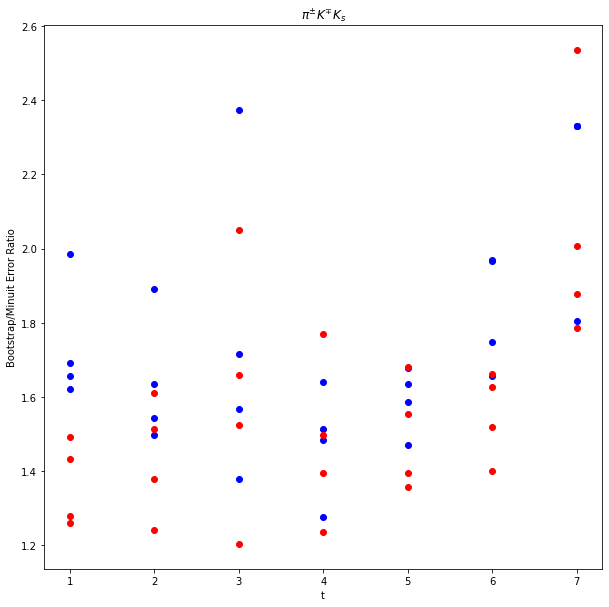

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df_pipkmks['t'], df_pipkmks['bs_rel_err']/df_pipkmks['nom_rel_err'], c='b')
ax.set_title('$\pi^{\pm}K^{\mp}K_s$')
ax.set_xlabel('t')
ax.set_ylabel('Bootstrap/Minuit Error Ratio')

ax.scatter(df_pimkpks['t'], df_pimkpks['bs_rel_err']/df_pimkpks['nom_rel_err'], c='r')
plt.show()